In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df['Summary'][0]

'Good Quality Dog Food'

As null values are very less, we will drop them for now 

In [6]:
df.dropna(subset=['Summary','ProfileName'], inplace=True)

In [7]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Check the noise in the data and clean it.

In [8]:
from collections import Counter

# join all reviews and split into words
all_words = ' '.join(df['Summary']).split()
most_common_words = Counter(all_words).most_common(20)
print(list(enumerate(most_common_words, start=1)))

[(1, ('Great', 48228)), (2, ('the', 39866)), (3, ('for', 37050)), (4, ('and', 33269)), (5, ('a', 28005)), (6, ('Good', 22434)), (7, ('but', 20885)), (8, ('good', 20477)), (9, ('to', 19745)), (10, ('of', 19566)), (11, ('I', 19529)), (12, ('Best', 17711)), (13, ('is', 17033)), (14, ('great', 16642)), (15, ('My', 15980)), (16, ('Not', 15398)), (17, ('this', 15299)), (18, ('not', 14912)), (19, ('it', 14183)), (20, ('The', 13386))]


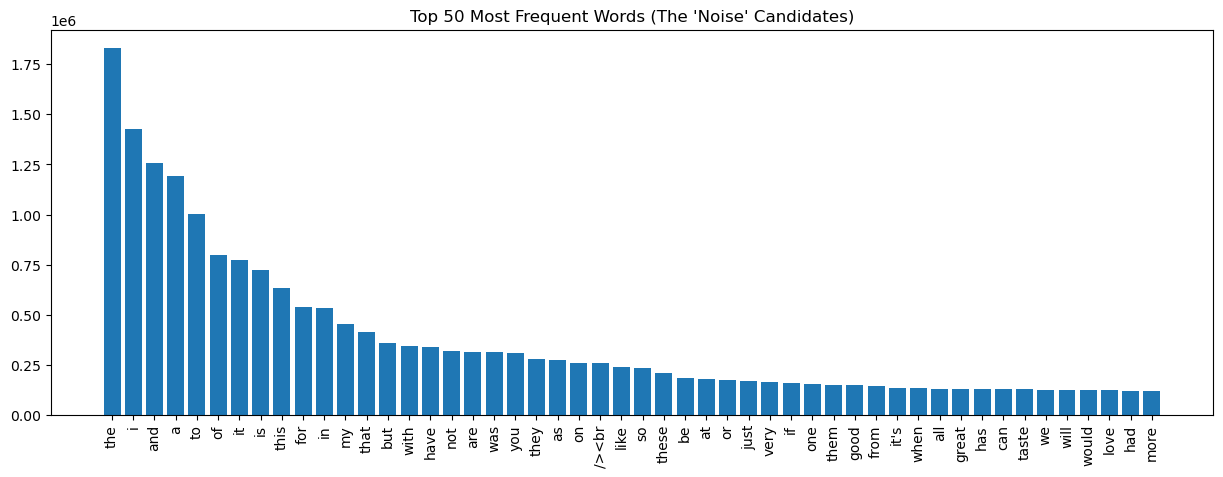

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize all words (simple split)
all_words = ' '.join(df['Text']).lower().split()
word_counts = Counter(all_words)

# Get the top 50 words
common_words = word_counts.most_common(50)
words, counts = zip(*common_words)

plt.figure(figsize=(15, 5))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 50 Most Frequent Words (The 'Noise' Candidates)")
plt.show()

Character level noise

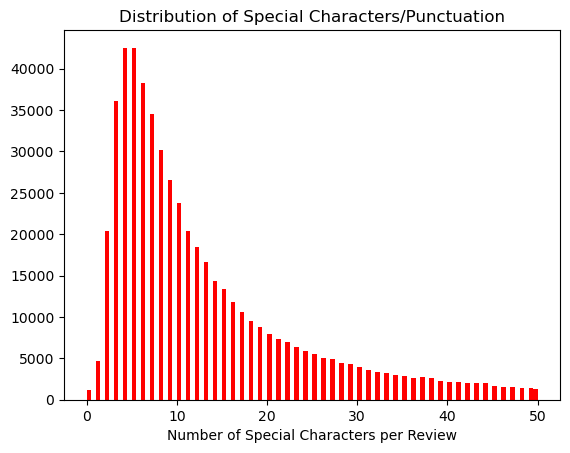

In [10]:
import re

def count_special_chars(text):
    # Find everything that IS NOT a letter, number, or space
    special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
    return len(special_chars)

df['special_char_count'] = df['Text'].apply(count_special_chars)

plt.hist(df['special_char_count'], bins=100, range=(0, 50), color='red')
plt.title("Distribution of Special Characters/Punctuation")
plt.xlabel("Number of Special Characters per Review")
plt.show()



'Another way to check for junk characters is using 'wordcloud'

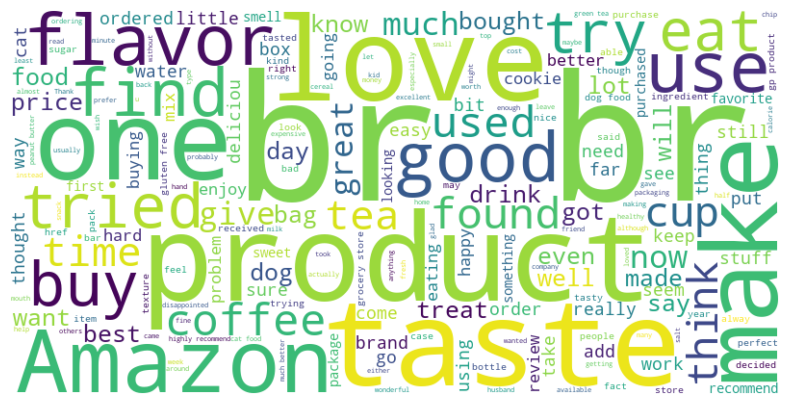

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Noise in above wordcloud is 'br', 'product', 'amazon','try' 

Domain specific noise - 'product', 'amazon'

Grammer noise - 'br', 'try'

N-Gram Visualization (Finding Repeating Junk)

### Data Cleaning and Preprocessing

In [ ]:
import re
import string
from nltk.corpus import stopwords

# Get standard English stopwords
stop_words = set(stopwords.words('english'))

# Add the 'Domain Noise' we found in your Word Cloud
stop_words.update(['br', 'amazon', 'product', 'one', 'get', 'would'])

def clean_text(text):
    # 1. Remove HTML tags (Targeting that big 'br' in your image)
    text = re.sub(r'<.*?>', '', text)
    
    # 2. Lowercase
    text = text.lower()
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 4. Remove stopwords and numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    return " ".join(tokens)

# Apply to 5 lakh rows 
df['cleaned_text'] = df['Text'].apply(clean_text)

In [13]:
df['cleaned_text'].head()

0    bought several vitality canned dog food produc...
1    arrived labeled jumbo salted peanutsthe peanut...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: cleaned_text, dtype: object

### Exploratory Data Analysis (EDA) on Cleaned Text 

Are  "Negative" reviews are more helpful than "Positive" ones? 

- Create a HelpfulnessRatio = (Numerator / Denominator)
- Reviews with 0 votes are noise. Reviews with high helpfulness are "Gold Standard" data.
- Reviews with high helpfulness are more likely to be "Positive"

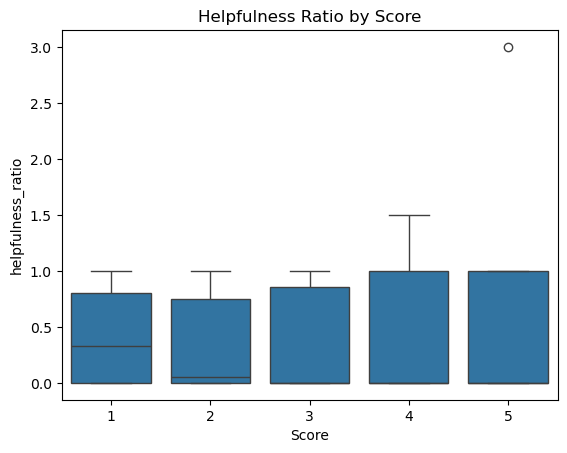

In [15]:
import seaborn as sns

# Handle division by zero (if denominator is 0, ratio is 0)
df['HelpfulnessDenominator'] = df['HelpfulnessDenominator'].replace(0, 1) # Avoid div/0
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

# Visualize: Do 1-star reviews get more helpful votes than 5-star?
sns.boxplot(x='Score', y='helpfulness_ratio', data=df)
plt.title("Helpfulness Ratio by Score")
plt.show()

In above case, positive reviews are more helpful than negative ones. 

- If we use helpfulness_ratio as a feature in our model, it will be a very strong predictor of positive sentiment.

2) Did Amazon Reviews get more positive or negative over time? 



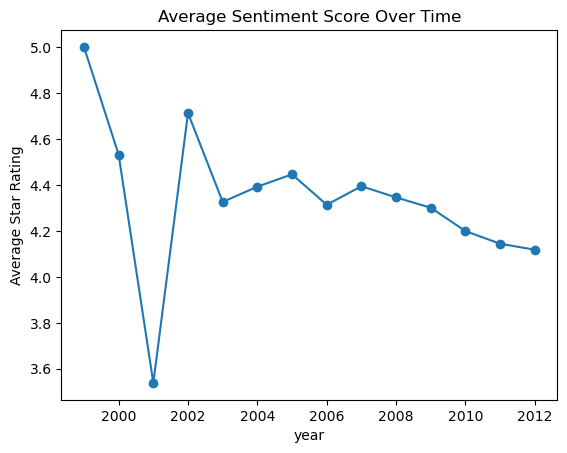

In [16]:
# Convert Unix timestamp to readable datetime
df['date'] = pd.to_datetime(df['Time'], unit='s')

# Extract Year for trend analysis
df['year'] = df['date'].dt.year

# Plot average sentiment over years
df.groupby('year')['Score'].mean().plot(kind='line', marker='o')
plt.title("Average Sentiment Score Over Time")
plt.ylabel("Average Star Rating")
plt.show()

3) User & Product Analysis (Spam Detection) 

- "Spam" Check: If one User ID has posted 10,000 reviews, they are likely a bot or a paid reviewer. You should drop them
- "Popularity" Check: If a Product ID has 20,000 reviews, it might bias the model towards that specific product's vocabulary (e.g., "coffee").

In [ ]:
# Top 10 Users by number of reviews
top_users = df['UserId'].value_counts().head(10)
print("Top Spammers/Power Users:\n", top_users)

# Filter out users with suspiciously high review counts (e.g., > 500)
# This is a common "Data Quality" step in industry

Top Spammers/Power Users:
 UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64


4) Is the product Quality dropping over time

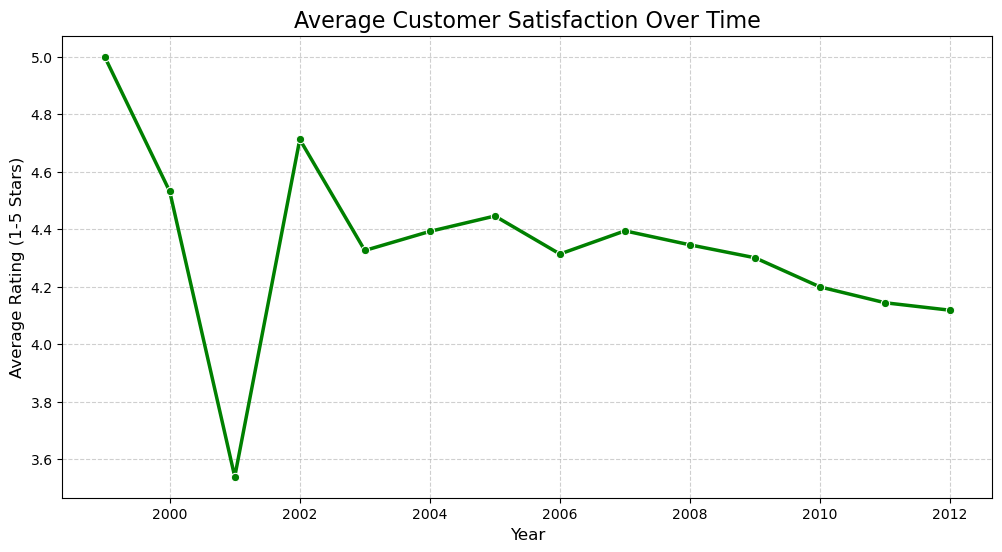

    year     Score
0   1999  5.000000
1   2000  4.531250
2   2001  3.538462
3   2002  4.712329
4   2003  4.325758
5   2004  4.392157
6   2005  4.445693
7   2006  4.313446
8   2007  4.394029
9   2008  4.345344
10  2009  4.300365
11  2010  4.198882
12  2011  4.143825
13  2012  4.117848


In [ ]:

# The 'Time' column is in Unix format (seconds since 1970), so we convert it
df['date'] = pd.to_datetime(df['Time'], unit='s')

# 2. Extract Year and Month for grouping
df['year'] = df['date'].dt.year

# 3. Aggregate: Calculate the Average Score per Year
yearly_trend = df.groupby('year')['Score'].mean().reset_index()

# 4. Visualize the Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Score', data=yearly_trend, marker='o', linewidth=2.5, color='green')

plt.title('Average Customer Satisfaction Over Time', fontsize=16)
plt.ylabel('Average Rating (1-5 Stars)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Quick print of the values
print(yearly_trend)

Sentiment Polarity

In [ ]:
from textblob import TextBlob

# Define the function to get the "sentiment" (-1 to 1)
def get_sentiment(text):
    # TextBlob calculates polarity based on adjectives and standard patterns
    return TextBlob(text).sentiment.polarity

# Apply to your full 'cleaned_text' column
# Note: On 500k rows, this might take ~2-5 minutes
df['polarity'] = df['cleaned_text'].apply(get_sentiment)

# Show the first few rows to verify
print(df[['Score', 'cleaned_text', 'polarity']].head())

   Score                                       cleaned_text  polarity
0      5  bought several vitality canned dog food produc...  0.425000
1      1  arrived labeled jumbo salted peanutsthe peanut...  0.216667
2      4  confection around centuries light pillowy citr...  0.187000
3      2  looking secret ingredient robitussin believe f...  0.150000
4      5  great taffy great price wide assortment yummy ...  0.458333


C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\4081483843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='polarity', data=df, palette='coolwarm')


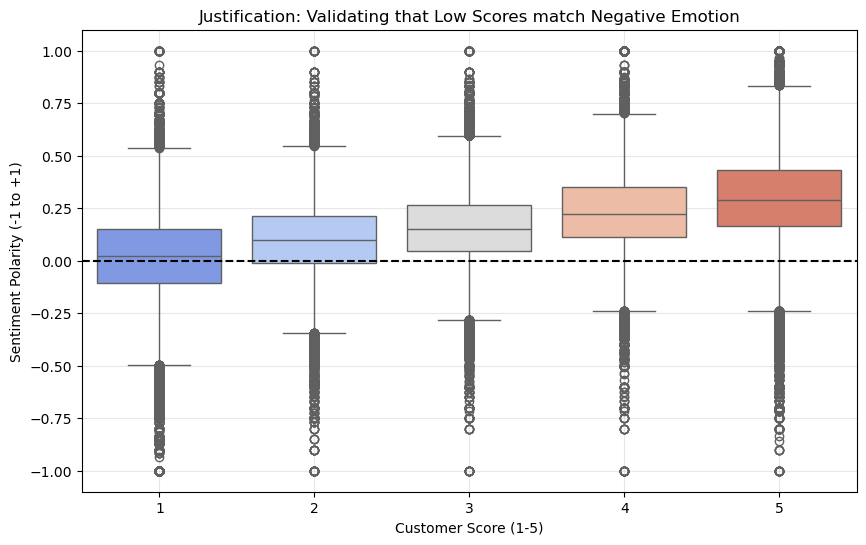

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='polarity', data=df, palette='coolwarm')
plt.title('Justification: Validating that Low Scores match Negative Emotion')
plt.xlabel('Customer Score (1-5)')
plt.ylabel('Sentiment Polarity (-1 to +1)')
plt.axhline(0, color='black', linestyle='--') # The Neutral Line
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Function to classify sentiment
def classify_sentiment(score):
    if score > 3:
        return 'Positive' # 1
    else:
        return 'Negative' # 0

# Apply to your dataframe
df['sentiment_label'] = df['Score'].apply(classify_sentiment)

# Check the new distribution
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    443756
Negative    124645
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\1460677710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


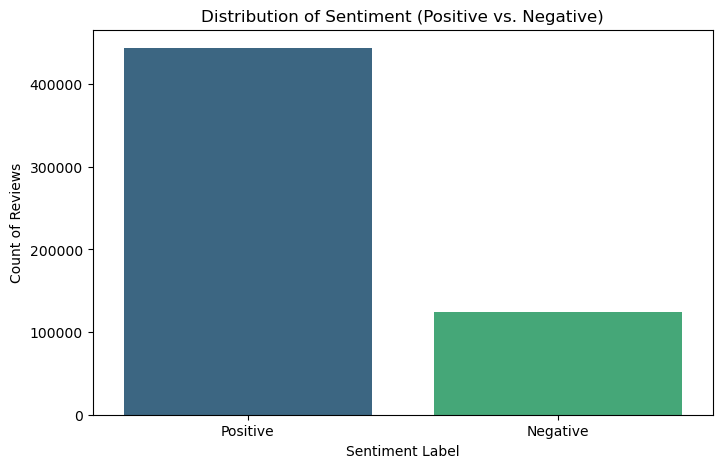

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Distribution of Sentiment (Positive vs. Negative)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count of Reviews')
plt.show()

The "Golden Era" (2002–2007): Satisfaction was stable and high (around 4.4 stars).

The "Decline" (2008–2012): There is a consistent downward trend, dropping to nearly 4.1 stars by 2012.

Business Insight: This is a red flag. It suggests that as the platform (Amazon) grew, either the product quality dropped, or customers became more critical.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2962400219.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


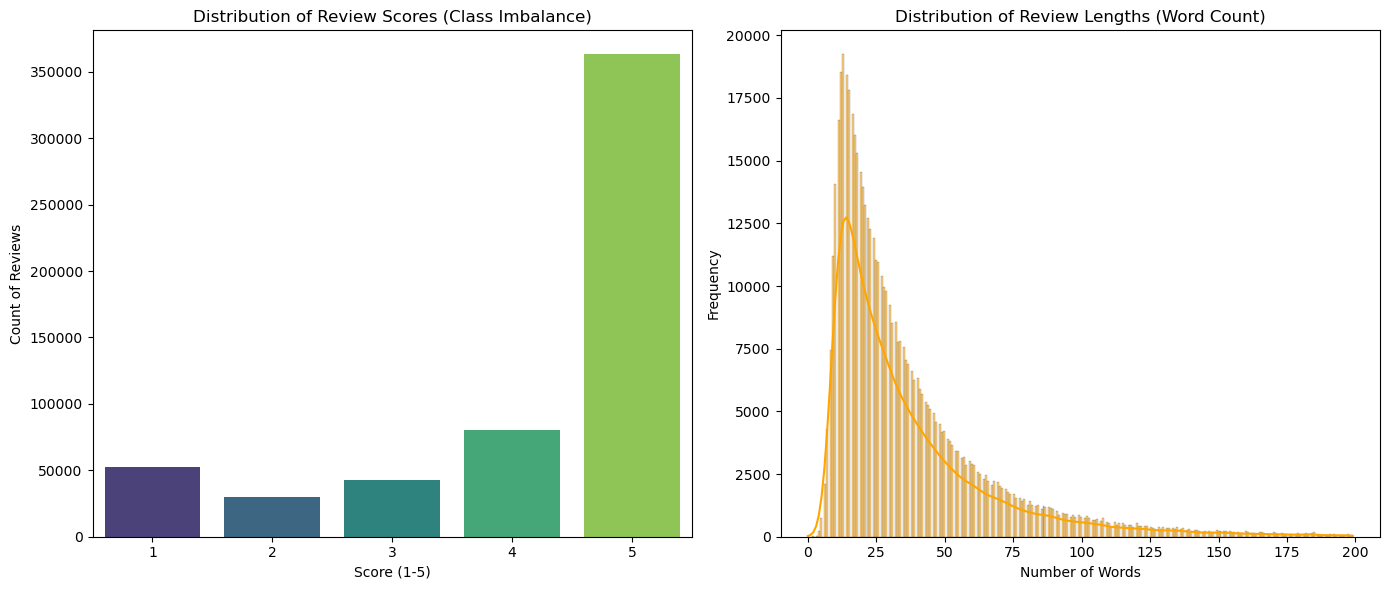

Target Class Counts:
 Score
5    0.638813
4    0.141896
1    0.091949
3    0.075014
2    0.052327
Name: proportion, dtype: float64

Review Length Stats:
 count    568401.000000
mean         38.772295
std          39.142587
min           0.000000
25%          16.000000
50%          27.000000
75%          47.000000
max        1897.000000
Name: word_count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(14, 6))

# --- 1. TARGET DISTRIBUTION (Class Imbalance Check) ---
plt.subplot(1, 2, 1)
# Counting the 'Score' column
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Review Scores (Class Imbalance)')
plt.xlabel('Score (1-5)')
plt.ylabel('Count of Reviews')

# --- 2. REVIEW LENGTH DISTRIBUTION (Outlier Check) ---
# Calculate word count for every review
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.subplot(1, 2, 2)
# Plotting histogram of word counts (limiting to 200 words for readability)
sns.histplot(df[df['word_count'] < 200]['word_count'], kde=True, color='orange')
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print exact numbers for your report
print("Target Class Counts:\n", df['Score'].value_counts(normalize=True))
print("\nReview Length Stats:\n", df['word_count'].describe())

- we have extreme class imbalance --> score 5 is very high while 1 and 2 are very low
- Problem : If we train a model now, it simply guesses 'positive' every time and achieve 80% accuracy without learning anything 
- Soln :  we simplify the Labels and Balance the data 
- Predicting exactly 1, 2, 3, 4, or 5 is very hard and often unnecessary. 
- we convert this into a Binary Classification problem (Positive vs. Negative) to get better results.
- Score 1 & 2 $\rightarrow$ Negative (0)
- Score 4 & 5 $\rightarrow$ Positive (1)
- Score 3 $\rightarrow$ Neutral (Usually dropped because it confuses the model). 

In [17]:
# Remove neutral reviews (Score = 3) to focus on clear positive/negative sentiment
df_filtered = df[df['Score'] != 3] 

def set_sentiment(score):
    if score >=4:
        return 1
    else:
        return 0 

df_filtered['Sentiment'] = df_filtered['Score'].apply(set_sentiment)




C:\Users\Admin\AppData\Local\Temp\ipykernel_4020\1264678727.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Score'].apply(set_sentiment)


In [18]:
df_filtered['Sentiment'].unique()

array([1, 0], dtype=int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568401 non-null  int64         
 1   ProductId               568401 non-null  object        
 2   UserId                  568401 non-null  object        
 3   ProfileName             568401 non-null  object        
 4   HelpfulnessNumerator    568401 non-null  int64         
 5   HelpfulnessDenominator  568401 non-null  int64         
 6   Score                   568401 non-null  int64         
 7   Time                    568401 non-null  int64         
 8   Summary                 568401 non-null  object        
 9   Text                    568401 non-null  object        
 10  special_char_count      568401 non-null  int64         
 11  cleaned_text            568401 non-null  object        
 12  helpfulness_ratio       568401 non-

### Data Preparation for Model Building

In [20]:
df_filtered.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'special_char_count', 'cleaned_text', 'helpfulness_ratio', 'date',
       'year', 'Sentiment'],
      dtype='object')

In [21]:
df_model = df_filtered[['cleaned_text', 'Sentiment']].copy()
df_model.head(2)

,cleaned_text,Sentiment
0,bought several vitality canned dog food produc...,1
1,arrived labeled jumbo salted peanutsthe peanut...,0


In [22]:
df_model.shape

(525763, 2)

### Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_model['cleaned_text'], df_model['Sentiment'], test_size=0.2, random_state=42
   
)

# 2. Initialize TF-IDF Vectorizer
# max_features=5000: We only keep the top 5,000 words to keep the model fast.
tfidf = TfidfVectorizer(max_features=5000)


# CRITICAL: We .fit() ONLY on X_train, then .transform() X_test.
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Shape of Training Data:", X_train_tfidf.shape)
print("Shape of Test Data:", X_test_tfidf.shape)

Shape of Training Data: (420610, 5000)
Shape of Test Data: (105153, 5000)


Algorithm 1 - Naive Bayes (The "Sentiment Specialist")

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize
nb_model = MultinomialNB()

# 2. Train
nb_model.fit(X_train_tfidf, y_train)

# 3. Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# 4. Evaluate
print("--- Naive Bayes Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))



--- Naive Bayes Results ---
Accuracy: 0.8832558272231891

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.27      0.42     16334
           1       0.88      1.00      0.94     88819

    accuracy                           0.88    105153
   macro avg       0.90      0.63      0.68    105153
weighted avg       0.89      0.88      0.86    105153



Naive Bayes saw that most reviews are Positive (Class 1), so it decided to guess "Positive" almost every time. It missed 73% of the customers reviewd negatively! It is not a good model.

Algorithm 2 - Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize (n_jobs=-1 uses all CPU cores for speed)
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1)

# 2. Train
lr_model.fit(X_train_tfidf, y_train)

# 3. Predict
y_pred_lr = lr_model.predict(X_test_tfidf)

# 4. Evaluate
print("--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

c:\Users\Admin\anaconda3\envs\Practice-One\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


--- Logistic Regression Results ---
Accuracy: 0.9304632297699542

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75     16334
           1       0.94      0.98      0.96     88819

    accuracy                           0.93    105153
   macro avg       0.89      0.83      0.86    105153
weighted avg       0.93      0.93      0.93    105153



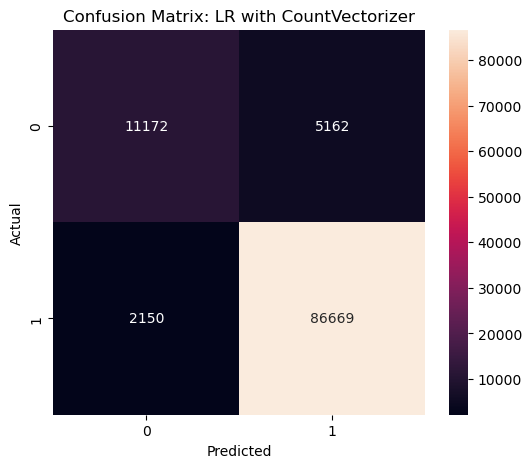

In [36]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Confusion Matrix: LR with CountVectorizer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Logistic Regression performed well. It successfully caught 68% of the negatively reviewed customers while maintaining high precision.

Algorithm 3 - Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# 1. Initialize (LinearSVC is faster than standard SVC for text)
# class weight balanced indicates model pays extra attention to the minority class 
svc_model = LinearSVC(class_weight='balanced', random_state=42)

# 2. Train
svc_model.fit(X_train_tfidf, y_train)

# 3. Predict
y_pred_svc = svc_model.predict(X_test_tfidf)

# 4. Compare
print("--- Linear SVC Results ---")
print(classification_report(y_test, y_pred_svc))

--- Linear SVC Results ---
              precision    recall  f1-score   support

           0       0.62      0.90      0.73     16334
           1       0.98      0.90      0.94     88819

    accuracy                           0.90    105153
   macro avg       0.80      0.90      0.83    105153
weighted avg       0.92      0.90      0.90    105153



F1-Score of LR is 	0.75  and SVC is 0.73 

### Let's treat the Imbalanced data with SMOTE (Synthetic Minority Over-sampling Technique) and check the performance of the model

In [26]:
from imblearn.over_sampling import SMOTE

# 1. Initialize SMOTE
# sampling_strategy='auto' means it resamples minority class to match majority class numbers
smote = SMOTE(random_state=42)

# 2. Fit SMOTE to Training Data ONLY
# (Never apply to Test data, that results in data leakage!)
print(f"Original Training Shape: {X_train_tfidf.shape}")
print(f"Original Class Distribution:\n{y_train.value_counts()}")

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print(f"\nNew Training Shape: {X_train_resampled.shape}")
print(f"New Class Distribution:\n{y_train_resampled.value_counts()}")

Original Training Shape: (420610, 5000)
Original Class Distribution:
Sentiment
1    354937
0     65673
Name: count, dtype: int64

New Training Shape: (709874, 5000)
New Class Distribution:
Sentiment
1    354937
0    354937
Name: count, dtype: int64


### Now we will apply Logistic Regression of Balanced data

### Approach 1:CountVectorizer + SMOTE + Logistic Regression

Training Logistic Regression on Balanced CountVectorizer data...


c:\Users\Admin\anaconda3\envs\Practice-One\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



--- RESULTS: Logistic Regression (CountVectorizer + Balanced) ---
Accuracy: 0.9213717155002711
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     16334
           1       0.95      0.95      0.95     88819

    accuracy                           0.92    105153
   macro avg       0.85      0.85      0.85    105153
weighted avg       0.92      0.92      0.92    105153



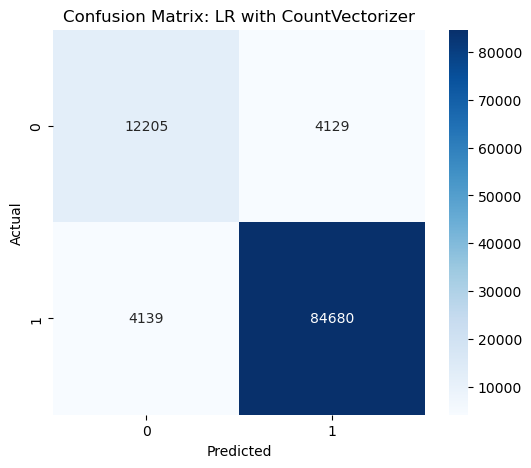

In [33]:
# 1. Initialize Logistic Regression
# C=1.0 is standard. You can increase it (e.g., C=10) to make the model stricter
lr_cv = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

# 2. Train on the ALREADY BALANCED CountVectorizer data
print("Training Logistic Regression on Balanced CountVectorizer data...")
lr_cv.fit(X_train_resampled, y_train_resampled)

# 3. Predict on Test Data (Note: Test data is never balanced!)
y_pred_cv = lr_cv.predict(X_test_cv)


print("\n--- RESULTS: Logistic Regression (CountVectorizer + Balanced) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print(classification_report(y_test, y_pred_cv))


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_cv), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: LR with CountVectorizer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

An F1 Score of 75% is pretty good. 

- A Precision of 0.75 means when model flags a negative review, it is correct 75% of the time.
- A Recall of 0.75 means we are catching 75% of customers who gave negative reviews.
- An F1-Score of 0.75 for the minority class in Sentiment Analysis is considered Production Grade.

Both Precision and recall are low 

### Now lets perform Hyperparameter tuning on above model(if it can improve the performance)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Define the parameters to test
# 'C' controls complexity.
# Small C (0.01) = Simple model (prevents overfitting)
# Large C (10) = Complex model (fits training data better)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear'] # 'liblinear' is fast for high-dimension text data
}

# 2. Initialize Grid Search
# scoring='f1': We tell it to strictly optimize for the F1 Score, not Accuracy!
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=3,           # 3-Fold Cross Validation
    scoring='f1',   # Maximize F1 score
    n_jobs=-1,      # Use all CPU cores
    verbose=1
)

# 3. Fit on your WINNING data (CountVectorizer + SMOTE)
print("Tuning Hyperparameters... (Finding the perfect C value)")
grid_search.fit(X_train_resampled, y_train_resampled)

# 4. Get the Best Model
best_model = grid_search.best_estimator_
print("\nBest Parameters Found:", grid_search.best_params_)

# 5. Final Evaluation
y_pred_tuned = best_model.predict(X_test_cv)

print("\n--- Tuned Logistic Regression Results ---")
print(classification_report(y_test, y_pred_tuned))

Tuning Hyperparameters... (Finding the perfect C value)
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters Found: {'C': 100, 'solver': 'liblinear'}

--- Tuned Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     16334
           1       0.95      0.96      0.95     88819

    accuracy                           0.92    105153
   macro avg       0.86      0.85      0.85    105153
weighted avg       0.92      0.92      0.92    105153



Precision improved to 76% and recall stays at 75%

### Lets save the model now 

In [43]:
import pickle
import os

# 1. Define filenames
model_filename = 'sentiment_model.pkl'
vectorizer_filename = 'sentiment_vectorizer.pkl'

# 2. Save the Vectorizer (The "Translator")

print(f"Saving vectorizer to {vectorizer_filename}...")
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfidf, file)

# 3. Save the Model (The "Brain")
# We use the 'best model' object (Logistic Regression trained on Balanced Data with Hyperparameter Tuning)
print(f"Saving model to {model_filename}...")
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nSUCCESS: Files saved! Check your folder for '{model_filename}' and '{vectorizer_filename}'.")



Saving vectorizer to sentiment_vectorizer.pkl...
Saving model to sentiment_model.pkl...

SUCCESS: Files saved! Check your folder for 'sentiment_model.pkl' and 'sentiment_vectorizer.pkl'.
